# Practical Session 3
## Biomedical Signals and Images
## Biomedical Image Processing (Image enhancement, Filtering and Segmentation)
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

[Mumtaz Hussain Soomro](http://www.etrovub.be/mhsoomro), [Jakub Ceranka](http://www.etrovub.be/jceranka) and [Jef Vandemeulebroucke](http://www.etrovub.be/JefVandemeulebroucke)

#### Student Names and IDs: 

Students names and IDs:
Tanjil Hasan - 0586496
Mahsa Alirezaee - 0574173
Academic Year : 2021-2022

# Purpose
The purpose of this exercise session is to obtain insight in the image enhancement, filtering and segmentation operations commonly applied in medical image processing. For more information on these concepts see the course slides and the related material.

The jupyter notebook should be submitted as the report of each practical session by teams of two students. In [colab](https://colab.research.google.com/notebooks/welcome.ipynb) you should download the notebook in the format *.ipynb and save it as a pdf version through print->save as pdf. Both the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. The deadline for the report submission is December 19th, 2021, at 23.59.

Any report sent after the deadline will not be graded. 

### Required modules
- [numpy](https://pypi.org/project/numpy/)
- [pylab](https://scipy.github.io/old-wiki/pages/PyLab)
- [scipy](https://www.scipy.org/getting-started.html)
- [skimage](https://scikit-image.org/docs/dev/api/skimage.html#module-skimage)
- [math](https://docs.python.org/3/library/math.html)
- [sklearn](https://scikit-learn.org/stable/index.html)
- [Matplotlib](https://matplotlib.org/3.1.1/index.html)

### 1 Image enhancement
#### 1.1 The image histogram
The histogram is a representation of how many pixels have a certain intensity in the corresponding image. Medical images can however have a large intensity range, or even floating point intensities, making the pixel count per intensity low or impractical. In practice, intensities are therefore usually binned, i.e. grouped in a reduced number of bins with similar intensity.
#### 1.2  Image enhancement
We shall discuss two ways of contrast improvement. The first is [linear contrast mapping](http://homepages.inf.ed.ac.uk/rbf/HIPR2/stretch.htm) or [histogram stretching](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html), which involves a linear transformation on the image intensities, such that the transformed intensities cover to the full range.
Another way to improve the contrast is to perform [histogram equalisation](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html). In this case, the aim is to obtain a uniform histogram, in which all intensities are equally represented. This can be done by applying a nonlinear transformation on the image intensities. It can be shown that the transform corresponds to the cumulative histogram.

#### Example 1: Linear contrast mapping 

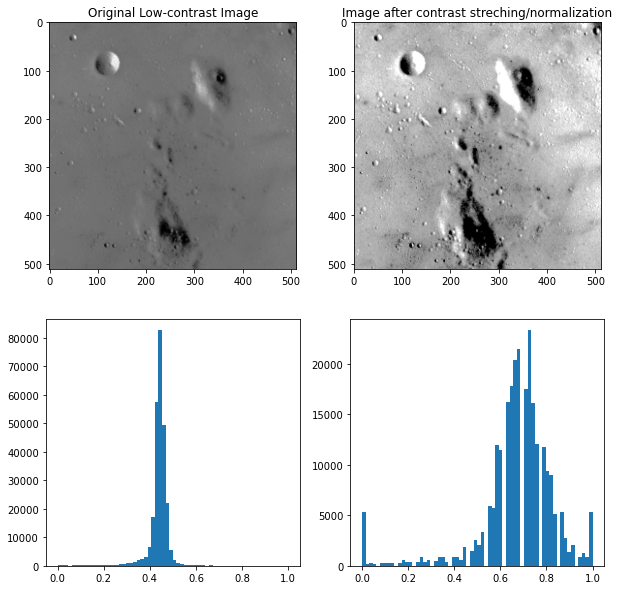

In [1]:
import numpy as np
from skimage import data, img_as_float
from pylab import show,title,figure,imshow,subplot,subplots_adjust, hist

# Load an example image
low_contrast_image = data.moon()

"contrast stretching (i.e., normalization),"
"where the image is rescaled to include all intensities that fall within the 2nd and 98th percentiles." 
    
p2, p98                  = np.percentile(low_contrast_image , (2, 98))  

i_min, i_max             = p2,p98

image_cliping            = np.clip(low_contrast_image , i_min,i_max)

image_constrast_streched = (image_cliping - i_min) / float(i_max - i_min) 

"Displaying low contrast image, contrast-enhanced image and their corresponding histogrms"

h,w=2,2    # figure height and width 
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(low_contrast_image , cmap='gray')
title('Original Low-contrast Image')

subplot(h,w,2)
imshow(image_constrast_streched, cmap='gray')
title('Image after contrast streching/normalization')

subplot(h,w,3)
hist(img_as_float(low_contrast_image).ravel(),bins=64) #plotting histogram of original low-contrast image

subplot(h,w,4)
hist(image_constrast_streched.ravel(),bins=64)#plotting histogram of contrast streched/normalized image
show()

#### Exercise 1.1: Linear contrast mapping
By following above example 1, solve the below exercise. 

- Read an image (Brain.tiff) 
  
  hint: user can load the image in different ways, like: [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread), [plt.imread](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html), [imread](https://pypi.org/project/imread/)
  
  preferable: from imread import imread. Install imread with pip install imread
- Perform linear contrast mapping (contrast streching/normalization)
- Display input image, output image (after linear contrast mapping), their corresponding histograms with 64 bins in a 2x2 figure. 

#### Report
- Look at the output result and its histogram. Compare it with the histogram of the original input image. Comment about difference between them. 

## Importing Libraries 

In [2]:
import numpy as np
from skimage import io,data, img_as_float
import matplotlib.pyplot as plt
#show,title,figure,imshow,subplot,subplots_adjust, hist

In [3]:
#reading an image from brain.tiff
brain_image = io.imread("Brain.tiff")

#performing liniear contrast stretching or normaliation

p2 , p98 = np.percentile(brain_image,(2,98))

image_cliping = np.clip(brain_image,p2,p98)

contrast_streched_image = (image_cliping - p2) / float(p98 - p2)

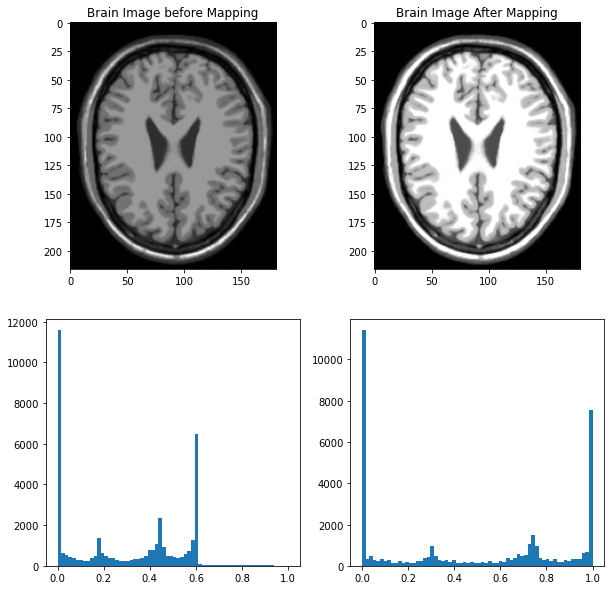

In [4]:
#Displaying plot 
h,w=2,2
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.2)

plt.subplot(h,w,1)
plt.imshow(brain_image , cmap='gray')
plt.title('Brain Image before Mapping')

plt.subplot(h,w,2)
plt.imshow(contrast_streched_image, cmap='gray')
plt.title('Brain Image After Mapping')

plt.subplot(h,w,3)
plt.hist(img_as_float(brain_image).ravel(),bins=64) 

plt.subplot(h,w,4)
plt.hist(contrast_streched_image.ravel(),bins=64)
plt.show()

## Answer of the Report 

As we know, contrast stretching is an algorithm implemented in order to enhance the existing contrast in the initial image. as is shown in the histogram of the first picture, the intensity distribution of the pixels are between 0 to almost near 1. by applying the normalisation, pixels become having more wide variety of intensity, which leads to having more contrast between paires of pixels, as we can see brighter pixels in the converted image have got a white area in comparison to the previous one

#### Example 2: Histogram equalisation
Students are suggested to have a look into [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) for a calculation of histogram.

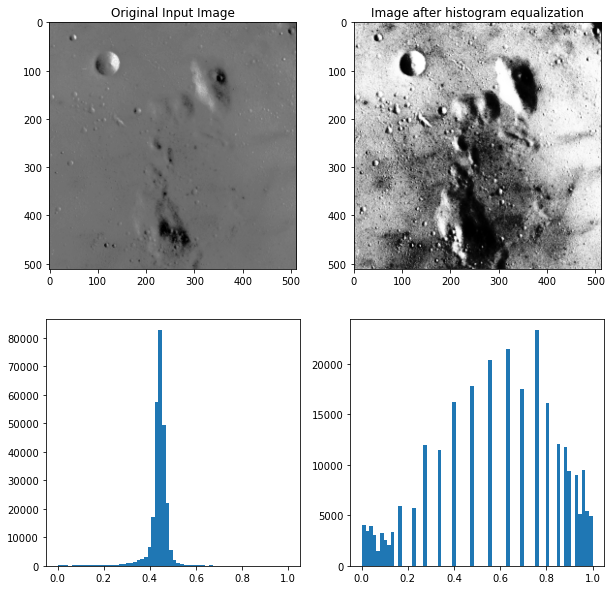

In [5]:
import numpy as np
from skimage import data, img_as_float
import pylab
from pylab import show,title,figure,imshow,subplot,subplots_adjust

"Load an example image"
image = data.moon()

"calculation of histogram"
hist, bin_edges = np.histogram(image.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(image.flat, bin_centers, img_cdf)
img_eq = out.reshape(image.shape)

"Displaying input image, image-histogram equalized and their corresponding histogrms"

h,w=2,2    # figure height and width 
figure(figsize=(10,10))
subplots_adjust(hspace=.2)

subplot(h,w,1)
imshow(image , cmap='gray')
title('Original Input Image')

subplot(h,w,2)
imshow(img_eq, cmap='gray')
title('Image after histogram equalization')

subplot(h,w,3)
pylab.hist(img_as_float(image).ravel(),bins=64) #plotting histogram of original image

subplot(h,w,4)
pylab.hist(img_eq.ravel(),bins=64)#plotting histogram of histogram-equalized image
show()



#### Exercise 1.2: Histogram equalization 
By following the example 2, solve the below exercise. 

- Read an image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
  
  eg: from imread import imread
  
  
- Perform histogram equalization [np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)
- Display input image, output image (after linear contrast mapping) of exercise 1.1, output image (histogram-equalized), their corresponding histograms with 64 bins in a 3x2 figure. 

#### Report
- Look at the output results and their histograms. Compare them with the histogram of the original input image. The histogram of the histogram-equalized output image is not perfectly uniform. What is the reason for this? 

In [6]:
#reading an image
brain_image_histo = io.imread("Brain.tiff")

#performing histogram equalization

hist_, bin_edges = np.histogram(brain_image_histo.ravel(), bins=64)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
img_cdf = hist_.cumsum()
img_cdf = img_cdf / float(img_cdf[-1])
out = np.interp(brain_image_histo.flat, bin_centers, img_cdf)
img_equalized = out.reshape(brain_image_histo.shape)

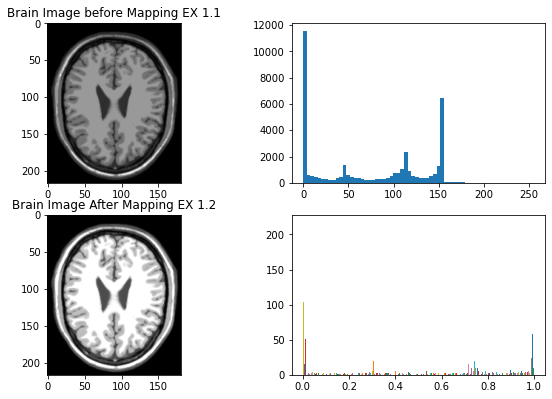

In [7]:
#Dislaying Plots

h,w=3,2    # figure height and width 
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.2)

plt.subplot(h,w,1)
plt.imshow(brain_image , cmap='gray')
plt.title('Brain Image before Mapping EX 1.1')

brain_plotting = brain_image.astype(float)
brain_plotting = brain_plotting.flatten()
plt.subplot(h,w,2)

plt.hist(brain_plotting,bins=64) 


plt.subplot(h,w,3)
plt.imshow(contrast_streched_image, cmap='gray')
plt.title('Brain Image After Mapping EX 1.2')

contrast_streched_image_plotting = contrast_streched_image.astype(float)
contrast_streched_image_plotting = contrast_streched_image_plotting.flatten()
plt.subplot(h,w,4)
plt.hist(contrast_streched_image,bins=64)
plt.show()

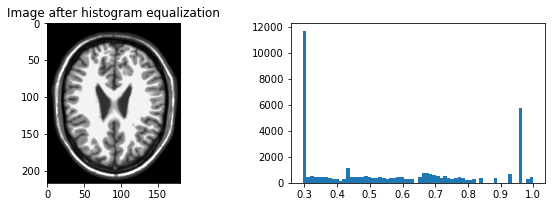

In [8]:
h,w=3,2    # figure height and width 
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.2)

plt.subplot(h,w,1)
plt.imshow(img_equalized, cmap='gray')
plt.title('Image after histogram equalization')

img_equalized_plotting = img_equalized.astype(float)
img_equalized_plotting = img_equalized_plotting.flatten()
plt.subplot(h,w,2)
plt.hist(img_equalized_plotting,bins=64)
plt.show()


Report

Another aproach for image enhancement is histogram equalization in which contrast incresed dramatically. This means after applying this method, pixels, instead of having a wide veriety of intensity to increase the contrast(histogram stretching), groups of pixels(), will have the same intensity. As is shown, we have a small group of pixels(about 5000)with '0' intensity and a larger group of pixels(more than 20000) with the dramatic intensity of near '0.8'. This leads to the intense contrast we are looking for

### 2 Image Denoising
Filters are used in medical imaging to enhance or suppress certain features of images. They may be used to improve the image quality before reviewing them, or as a preprocessing step to improve the result of further image processing steps such as segmentation.
For many filters, the extent of the neighbourhood considered for each pixel is determined by a spatial filter mask (kernel). The weights of the mask can be combined with the underlying pixels in a linear way, in which case this comes down to a convolution of the mask and image. Other filters however exist, based on non-linear operations.
#### 2.1 Noise suppression
An important processing task is the suppression of noise, either for enhanced visualization or for improving the result of further processing. Noise can often be assumed to be a high frequency signal. Many noise reduction approaches are therefore based on attenuating the high frequency components while preserving the low frequency components. A popular linear filter for this purpose is the (2D) Gaussian filter.
Low pass filtering for noise suppression has the side effect of blurring the edges of an image, which is often undesirable. Smoothing filters that preserve the edges of an image have therefore been proposed, such as the non-linear median filter.
#### 2.2 Edge enhancement
Image filtering can also be used for the enhancement or detection of edges. The goal of such filters is often to enhance the edge contrast of an image in an attempt to improve its apparent sharpness. If the final goal is to retain an edge image, i.e. a binary image in which only the edges are preserved, the operation is termed edge detection. Such images can later on serve as inputs for further image processing steps such as segmentation.

#### Example 3: Image denoising by different filters (i.e, [Gaussian filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html), [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) and [average filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

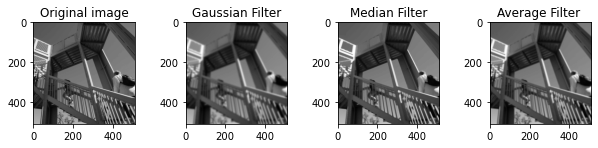

In [9]:
from scipy import misc
from scipy import ndimage
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image           = misc.ascent()                             # load input image
Gaussian_filter = ndimage.gaussian_filter(image, sigma = 3) # gaussian filter with standard deviation = 3
median_filter   = ndimage.median_filter(image, size = 7)    # median filter with kernel size of 7
kernel          = np.ones(shape=(6,6))/18                    # define kernel for average filter, kernel size is 6
average_filter  = ndimage.convolve (image, kernel)          # average filter 

"displaying original image, results from gaussian, median and average filters"

h,w=1,4    # figure height and width 
figure(figsize=(10,10));subplots_adjust(hspace=0.2,wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Gaussian_filter, cmap='gray');title('Gaussian Filter')
subplot(h,w,3);imshow(median_filter, cmap='gray');title('Median Filter')
subplot(h,w,4);imshow(average_filter , cmap='gray');title('Average Filter ')
show()

#### Example 4: Edge Enhancement 
Enhancing edge of an image using [prewitt function](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt)

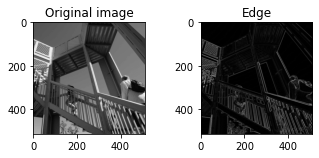

In [10]:
from scipy import misc
from skimage.filters import prewitt
from pylab import show,title,figure,subplot,subplots_adjust, imshow

image  = misc.ascent()      # load input image
Edge   = prewitt (image)   # find edge

h,w=1,2                   # figure height and width 
figure(figsize=(5,5));subplots_adjust(hspace=0.5, wspace=0.5)
subplot(h,w,1);imshow(image, cmap='gray');title('Original image')
subplot(h,w,2);imshow(Edge, cmap='gray');title('Edge')
show()

#### Exercise 2
To illustrate image filtering we will try to restore an image, obtained by distorting Brain.tiff with Salt and Pepper noise (Brain_noise_SnP.tiff).
In the first part of the exercise, we will focus on Gaussian smoothing. Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Read input image (Brain.tiff)
- Read noisy image (Brain_noise_SnP.tiff)
- Apply [Gaussian filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html) to the noisy image with a standard deviation of 1.
- Calculate the difference image of the input noisy image with the obtained filtered image.
- Calculate the difference image of the obtained filtered image with the provided ground truth (Brain.tiff).
- Create a simple edge map of the obtained filtered image using the [edge function and prewitt mask](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.prewitt).
- Display input image, noisy image, gaussian filtered image, filtered noise and unfiltered noise. 

#### Report
- Repeat the process, for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) for a kernel of size 3 and an average filter using a kernel of size 3. For the average filter you will have to create your own filter kernel.
- Calculate the [root mean squared differences (RMSD)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of the pixels of the obtained filtered images with those of the ground truth. RMSD is a frequently used measure of the differences between values. Hint: RMSD = [sqrt](https://www.tutorialspoint.com/python/number_sqrt.htm) ([mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (input image, filtered image))
- Display a three-by-four plot with the filtered images obtained using the different filters, the filtered noise, the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image.
- Provide all three values for the RMSD between filtered image and the ground truth.
- Comment briefly on the results.
- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?
- Which filter works best in terms of RMSD and why?
- Which filter preserves the edges the best?

### Excerise 2 Implementing

==========  GUSSIAN FILTER  ==========


Text(0.5, 1.0, 'Un-Filtered Noise')

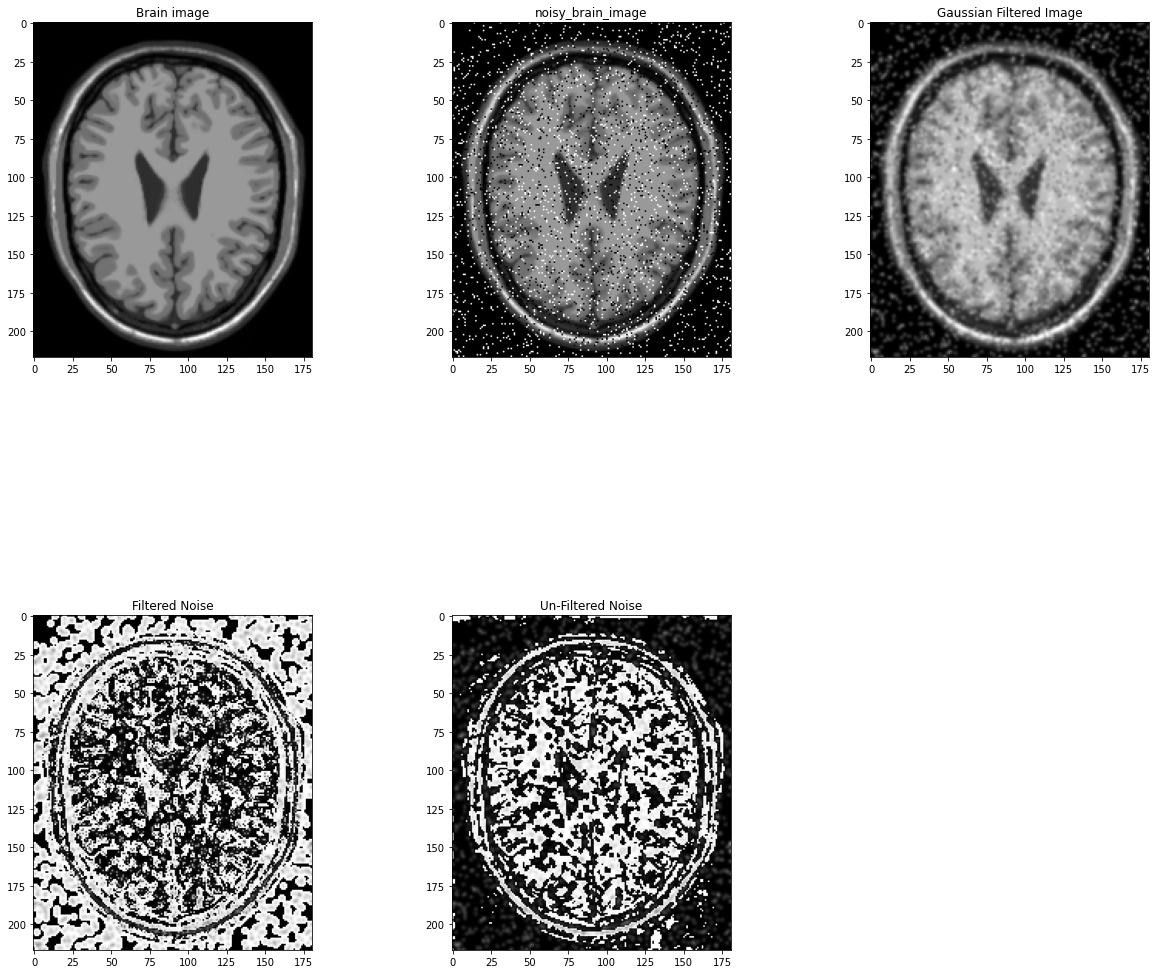

In [11]:
print("==========  GUSSIAN FILTER  ==========")
noisy_brain_image = io.imread("Brain_noise_SnP.tiff")

Gaussian_filtered_image = ndimage.gaussian_filter(noisy_brain_image, sigma = 1)

#calculating deffrences of inputted _nosiy image and filtered image
from sklearn.metrics import mean_squared_error

diffences = mean_squared_error(noisy_brain_image,Gaussian_filtered_image, squared=False)

#calculating deffrences of inputted _btain image and filtered image

diffences1 = mean_squared_error(brain_image,Gaussian_filtered_image, squared=False)

from skimage import filters

#detecting edges using the function
edge_map_Gaussian = filters.prewitt(Gaussian_filtered_image)

h,w = 2,3
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)

plt.subplot(h,w,1);imshow(brain_image, cmap='gray');title('Brain image')
plt.subplot(h,w,2);imshow(noisy_brain_image, cmap='gray');title('noisy_brain_image')
plt.subplot(h,w,3);imshow(Gaussian_filtered_image, cmap='gray');title('Gaussian Filtered Image')
plt.subplot(h,w,4);imshow(noisy_brain_image-Gaussian_filtered_image, cmap='gray');title('Filtered Noise')
plt.subplot(h,w,5);imshow(Gaussian_filtered_image-brain_image, cmap='gray');title('Un-Filtered Noise')

#### Report

- Repeat the process, for a [median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html) for a kernel of size 3 and an average filter using a kernel of size 3. For the average filter you will have to create your own filter kernel.

==========  MEDIAN FILTER  ==========


Text(0.5, 1.0, 'Un-Filtered Noise')

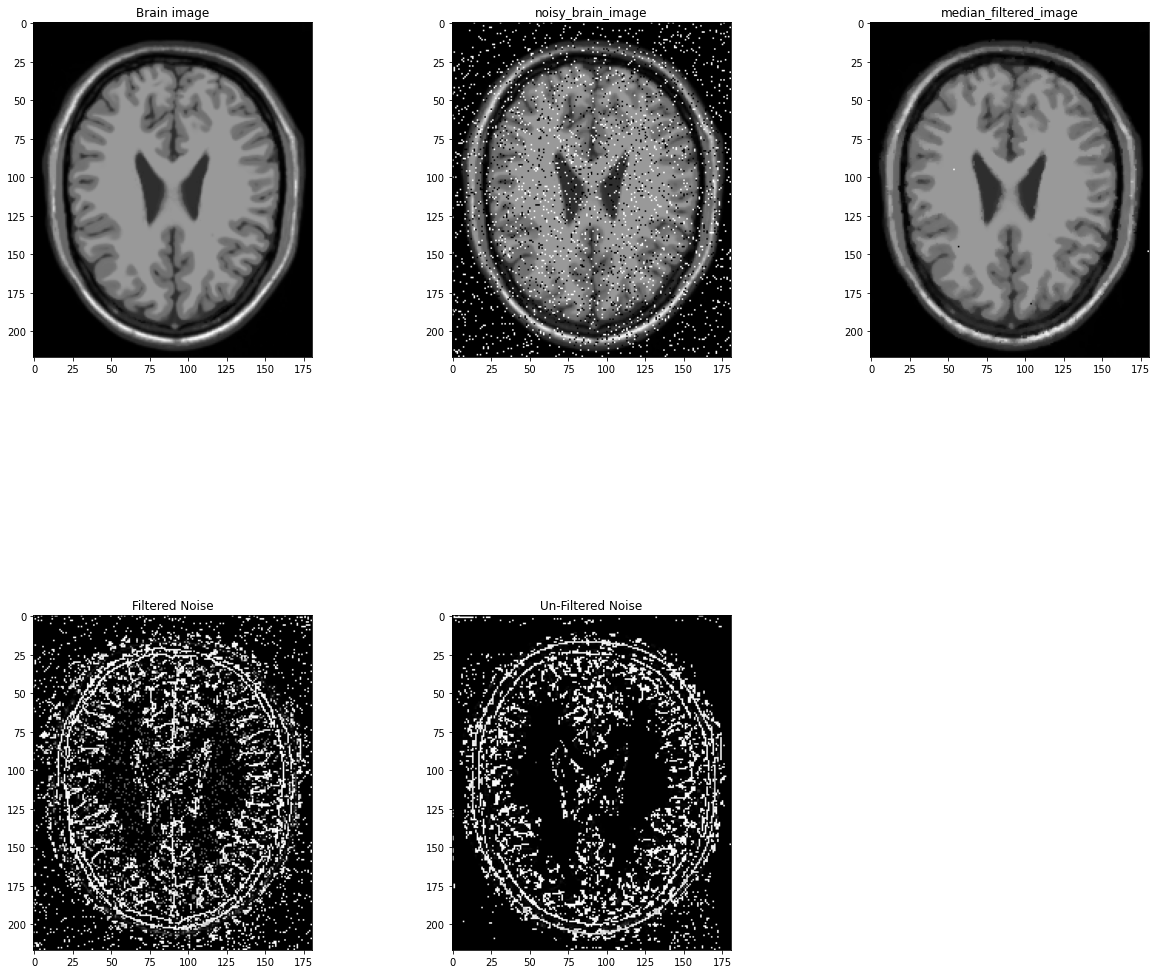

In [12]:
#Median Filter

print("==========  MEDIAN FILTER  ==========")
median_filtered_image   = ndimage.median_filter(noisy_brain_image, size = 3)

#implmentation of mean squred error which refers the diffrence between two image
#noisey image vs filtered image
diffences_median_vs_Noisy_Brain = mean_squared_error(noisy_brain_image,median_filtered_image, squared=False)
#brain image vs filtered image
diffences_median_vs_Brain = mean_squared_error(brain_image,median_filtered_image, squared=False)

edge_map_median = filters.prewitt(median_filtered_image)

h,w = 2,3
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)

plt.subplot(h,w,1);imshow(brain_image, cmap='gray');title('Brain image')
plt.subplot(h,w,2);imshow(noisy_brain_image, cmap='gray');title('noisy_brain_image')
plt.subplot(h,w,3);imshow(median_filtered_image, cmap='gray');title('median_filtered_image')
plt.subplot(h,w,4);imshow(noisy_brain_image-median_filtered_image, cmap='gray');title('Filtered Noise')
plt.subplot(h,w,5);imshow(median_filtered_image-brain_image, cmap='gray');title('Un-Filtered Noise')

==========  AEVERAGE FILTER  ==========


Text(0.5, 1.0, 'Un-Filtered Noise')

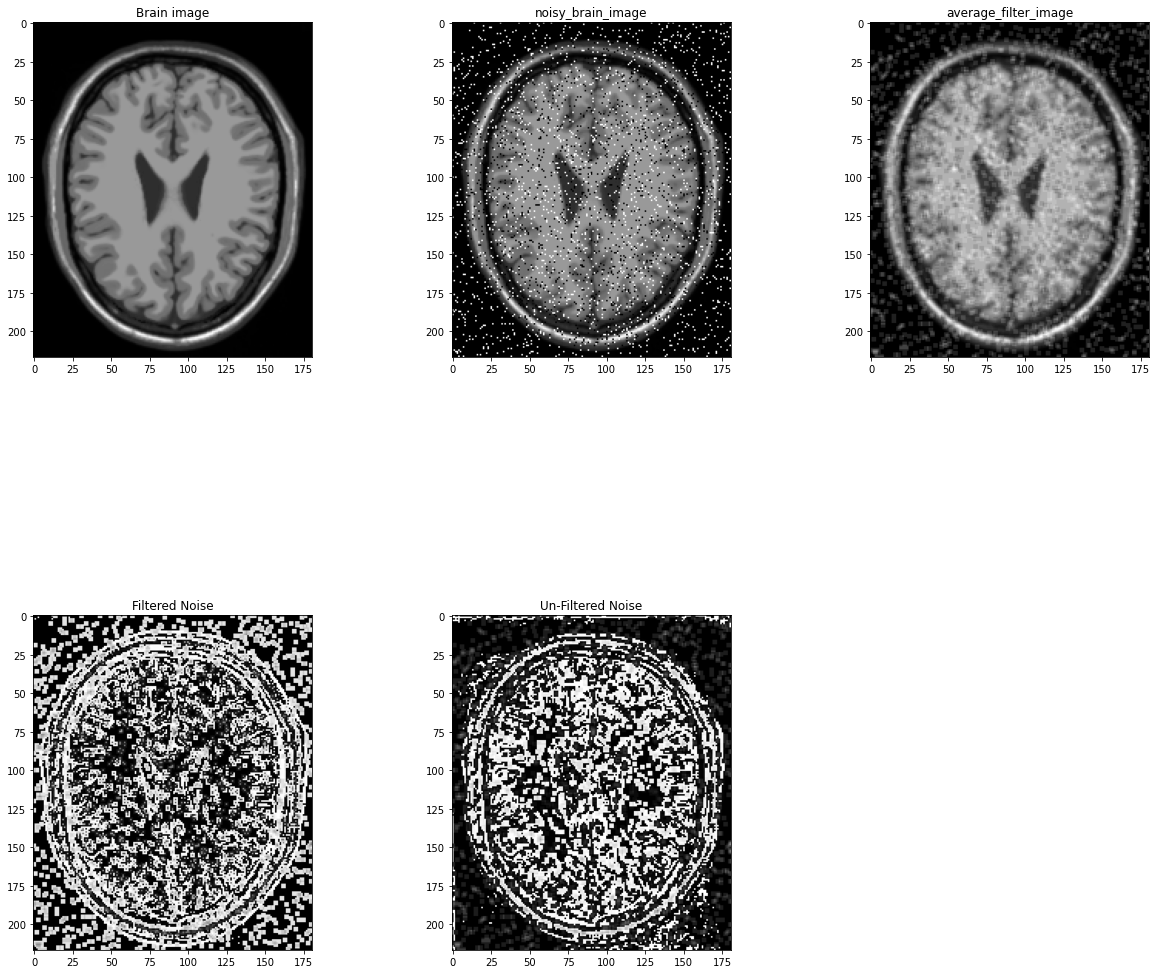

In [13]:
#Average Filter 

print("==========  AEVERAGE FILTER  ==========")
kernel = np.ones(shape=(3,3))/9
average_filter = ndimage.convolve (noisy_brain_image, kernel)

diffences_average_vs_Noisy_Brain = mean_squared_error(noisy_brain_image,average_filter, squared=False)
diffences_average_vs_Brain = mean_squared_error(brain_image,average_filter, squared=False)

edge_map_averge = filters.prewitt(average_filter)

h,w = 2,3
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)

plt.subplot(h,w,1);imshow(brain_image, cmap='gray');title('Brain image')
plt.subplot(h,w,2);imshow(noisy_brain_image, cmap='gray');title('noisy_brain_image')
plt.subplot(h,w,3);imshow(average_filter, cmap='gray');title('average_filter_image')
plt.subplot(h,w,4);imshow(noisy_brain_image-average_filter, cmap='gray');title('Filtered Noise')
plt.subplot(h,w,5);imshow(average_filter-brain_image, cmap='gray');title('Un-Filtered Noise')

- Calculate the [root mean squared differences (RMSD)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of the pixels of the obtained filtered images with those of the ground truth. RMSD is a frequently used measure of the differences between values. Hint: RMSD = [sqrt](https://www.tutorialspoint.com/python/number_sqrt.htm) ([mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (input image, filtered image))

In [14]:
diffences_Gussian_vs_Brain = mean_squared_error(brain_image,Gaussian_filtered_image, squared=False)
diffences_median_vs_Brain = mean_squared_error(brain_image,median_filtered_image, squared=False)
diffences_average_vs_Brain = mean_squared_error(brain_image,average_filter, squared=False)


- Display a three-by-four plot with the filtered images obtained using the different filters, the filtered noise, the noise that remained after the filtering (unfiltered) and the edge maps of the filtered image.

Text(0.5, 1.0, 'edge_map_averge')

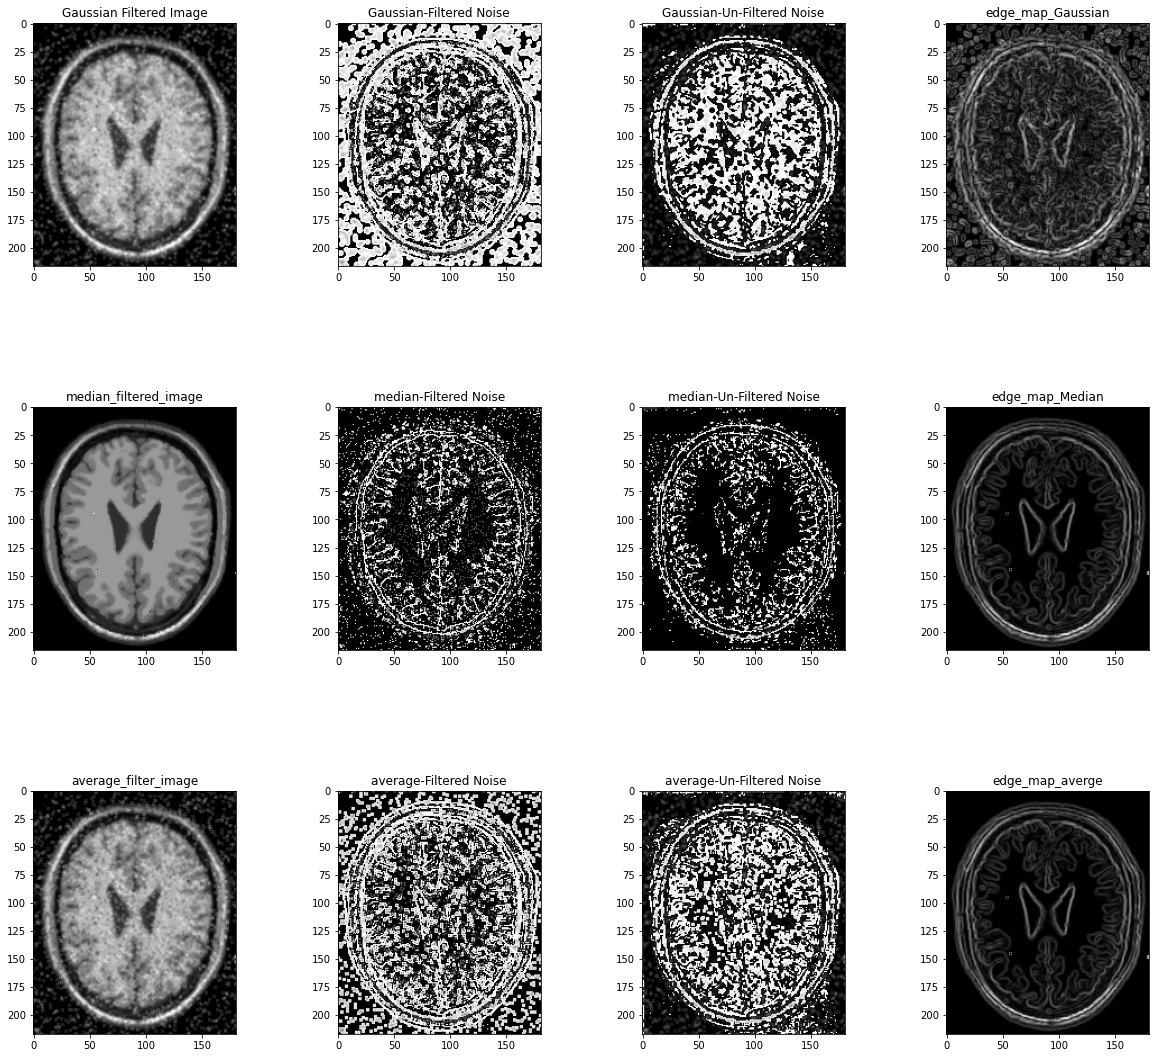

In [15]:
h,w = 3,4
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)

plt.subplot(h,w,1);imshow(Gaussian_filtered_image, cmap='gray');title('Gaussian Filtered Image')
plt.subplot(h,w,2);imshow(noisy_brain_image-Gaussian_filtered_image, cmap='gray');title('Gaussian-Filtered Noise')
plt.subplot(h,w,3);imshow(Gaussian_filtered_image-brain_image, cmap='gray');title('Gaussian-Un-Filtered Noise')
plt.subplot(h,w,4);imshow(edge_map_Gaussian, cmap='gray');title('edge_map_Gaussian')

plt.subplot(h,w,5);imshow(median_filtered_image, cmap='gray');title('median_filtered_image')
plt.subplot(h,w,6);imshow(noisy_brain_image-median_filtered_image, cmap='gray');title('median-Filtered Noise')
plt.subplot(h,w,7);imshow(median_filtered_image-brain_image, cmap='gray');title('median-Un-Filtered Noise')
plt.subplot(h,w,8);imshow(edge_map_median, cmap='gray');title('edge_map_Median')

plt.subplot(h,w,9);imshow(average_filter, cmap='gray');title('average_filter_image')
plt.subplot(h,w,10);imshow(noisy_brain_image-average_filter, cmap='gray');title('average-Filtered Noise')
plt.subplot(h,w,11);imshow(average_filter-brain_image, cmap='gray');title('average-Un-Filtered Noise')
plt.subplot(h,w,12);imshow(edge_map_median, cmap='gray');title('edge_map_averge')

- Provide all three values for the RMSD between filtered image and the ground truth.

In [16]:
print(f"Gussain Filters RMSD == > {diffences_Gussian_vs_Brain}")
print(f"Median Filters RMSD == > {diffences_median_vs_Brain}")
print(f"Average Filters RMSD == > {diffences_average_vs_Brain}")

Gussain Filters RMSD == > 8.089886959064533
Median Filters RMSD == > 3.255876404153823
Average Filters RMSD == > 7.209773650738234


- What is the interpretation of the difference image with the ground truth and the difference image with the original input image?

The image's contrast with the fundamental truth and the image's contrast with the original text are complementary. When put together, it creates the entire soundscape of our real-life scene.

### Which filter works best in terms of RMSD and why? Which filter preserves the edges the best?

Filter based on the median. Because RMSD emphasizes price differences, the smaller the RMSD, the more accurate our filtered image is. It responds best to the Median filter with the least RMSD. Filter based on the median. When compared to central Gaussian filters, it is less sensitive to outsiders.

### 3 Image segmentation
Segmentation is the task of defining the boundaries of an object or region in an image. It is often used for measuring size or volume of organs or other tissues of interest. A multitude of different methods exist and the optimal choice of segmentation method is highly dependent on the region to be segmented, and the type and quality of the input image.
#### 3.1 Thresholding
Image thresholding is the simplest and fastest segmentation method. The process comes down to defining one or more boundaries of intensity in the im- age histogram. Pixels with intensity within the boundaries will get mapped to 1 (inside), while others are considered background. The process can be extended to multiple labels using multiple (upper and lower) boundaries.
Thresholding can be done by manually selecting the boundaries, or automatically, by optimizing the boundary values with respect to a certain criterion. For instance, Otsu thresholding will automatically select boundaries that maximize the between class variance of two or more regions.
#### 3.2 Region Growing
Region growing is an iterative segmentation approach in which an initial region (usually a single seed point) is grown by including its neighbouring pixels if they fulfil certain requirements.
In its simplest form, region growing is closely related to thresholding, mainly using the image intensity to drive the algorithm. The algorithm has the benefit of taking into account spatial connectivity, thereby enabling to limit the segmentation to connected regions.
#### 3.3 Dice Coefficient
A common way to evaluate segmentations is to compare the obtained object S, with the reference or ground truth R provided by physicians after manual segmentations. A popular measure for quantitative evaluation is computing the Dice coefficient D, which compares the volumes (|.|) of the overlap of both objects to average volume,

\begin{equation*}
D(S,R)= \frac{ 2|S∩R|} { |S| + |R|}
\end{equation*}

#### Example 5: [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) 

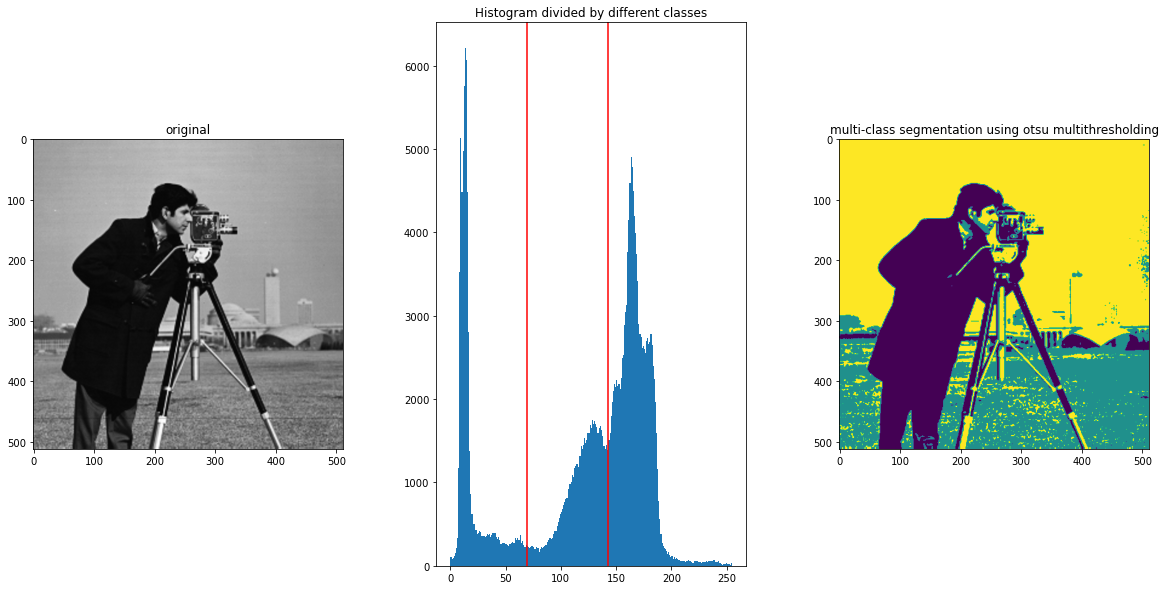

In [17]:
import numpy as np
from skimage import data
from skimage.filters import threshold_multiotsu
from pylab import show,title,figure,subplot,subplots_adjust, imshow, hist,axvline

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, 3, nbins=255)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

h,w=1,3                    # figure height and width 
figure(figsize=(20,10));subplots_adjust(hspace=0.3, wspace=0.3)

subplot(h,w,1)
imshow(image, cmap='gray');title('original')

subplot(h,w,2)
hist(image.ravel(), bins=255, histtype = 'bar');title('Histogram divided by different classes')
for thresh in thresholds:
    axvline(thresh, color='r')
    
subplot(h,w,3)
imshow(regions);title('multi-class segmentation using otsu multithresholding')
show()

#### Exercise 3.1 [Multi-Otsu  thresholding](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) for segmenting ventricles and white matter.
By following the example 5, solve exercise 3.1:

- Read input image (Brain.tiff) using [imread](https://pypi.org/project/imread/)
- Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Plot the histogram and the four thresholds obtained from [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py), result of mul/ti-class segmentation using [multi-Otsu](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) and different four regions. Hint for plotting four different regions: 
                  b0 = regions==0;imshow(b0,'gray');title('Background');show();
                  b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
                  b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
                  b3 = regions==3;imshow(b3,'gray');title('White matter');show();
- Calculate Dice coeffient between segmented ventricals (b1) and groundtruth image for ventricals segmentation (GroundTruthVentricles[:,:,0])
- Calculate Dice coeffient between segmented gray matter (b3) and groundtruth image for white matter segmentation (grndTruthWM1[:,:,0])

- Dice coefficient function: 
    
     def dice_coeff(im1,im2):
         im1 = im1.astype(np.bool)
         im2 = im2.astype(np.bool)
         intersect = np.logical_and(im1,im2)
         return 2*intersect.sum()/(im1.sum() + im2.sum())

In [18]:
from skimage.filters import threshold_multiotsu
#Reading groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)

Ground_truth_ventricles = io.imread("GroundTruthVentricles.tiff")

#Reading groundtruth image of (grndTruthWM1.tiff)
Ground_truth_white_matter = io.imread("grndTruthWM1.tiff")

#Applying multi otsu threshold on input image

threshold_input_image = threshold_multiotsu(brain_image, 4, nbins=255)

# Using the threshold values, we generate the three regions.
regions = np.digitize(brain_image, bins=threshold_input_image)


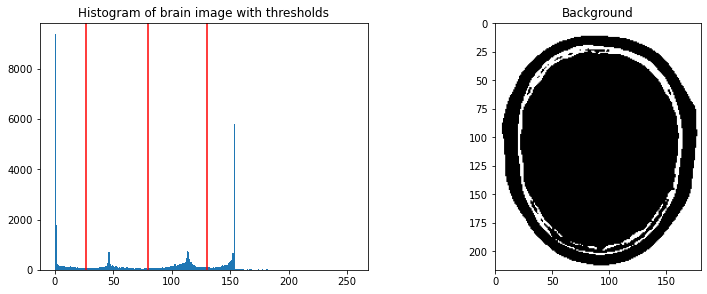

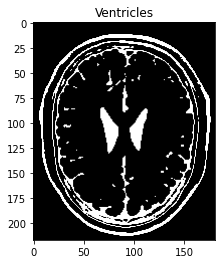

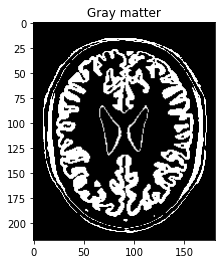

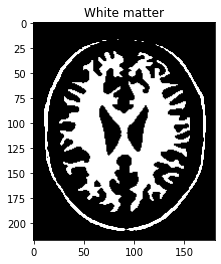

Text(0.5, 1.0, 'Multi class segmentation Multithresholds usuing otsu')

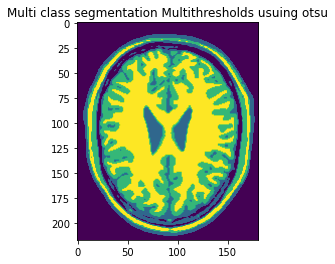

In [19]:
h,w=2,3                    # figure height and width 
figure(figsize=(20,10))#;subplots_adjust(hspace=0.3)

plt.subplot(h,w,1)
plt.hist(brain_image.ravel(),bins = 255, histtype = 'bar');title('Histogram of brain image with thresholds')

for thresh in threshold_input_image:
    axvline(thresh, color='r')
plt.subplot(h,w,2)
b0 = regions==0;imshow(b0,'gray');title('Background');show();
b1 = regions==1;imshow(b1,'gray');title('Ventricles');show();
b2 = regions==2;imshow(b2,'gray');title('Gray matter');show();
b3 = regions==3;imshow(b3,'gray');title('White matter');show();

plt.imshow(regions);title("Multi class segmentation Multithresholds usuing otsu")


In [20]:

def dice_coef(image1 , image2):
    image1 = image1.astype(np.bool)
    image2 = image2.astype(np.bool)
    
    intersection = np.logical_and(image1,image2)
    return 2 * intersection.sum()/(image1.sum()+image2.sum())

In [21]:
#dtermining dice coefficient segmented ventricals (b1)  and Ground_truth_ventricles
dice_coef1 = dice_coef(Ground_truth_ventricles[:,:,0],b1)

#dtermining dice coefficient segmented ventricals (b3)  and Ground_truth_whitematter
dice_coef2 = dice_coef(Ground_truth_white_matter[:,:,0],b3)

#### Exercise 3.2 Region Growing Segmentation 
You should note that in the previous exercise it was not possible to separate the ventricles or white matter from some other structures completely. In this exercise will attempt to do this by implementing a region growing algorithm in its simplest form.
The algorithm should output a binary image with pixel values 1 for the structure under study and 0 for all other pixels. As an input it should use one or two threshold values that were obtained from the previous exercise and a seed point. 

To select your seeds for the region growing algorithm, inspect the image and find a point coordinate (X,Y) which later will be used as a seed point for your segmentation algorithm. A chosen point location has to be within the structure you are planning to segment.

Using the implemented algorithm, try to segment each of the ventricles and the white matter using suitable seed points and calculate the Dice coefficients with respect to the ground truth images introduced above.

Note: region growing function is given.


##### Ventricles segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for ventricals segmentation (GroundTruthVentricles.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- For the first ventricle segmentation
- Step 4. Choose seed point. There are two ventricles, therefore, user has to repeat the process of choosing seed point twice. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
                Hint: seg1 = region_growing(Image, seed, thresholds[0], conn=4)
- For the second ventricle segmentation 
- Step 6. Repeat steps 4 and 5
- Step 7. Get final segmentation by adding first and second ventricle segmentations. 
- Step 8. Calculate Dice coefficient between final ventricles segmentation and groundtruth (GroundTruthVentricles[:,:,0]).  

##### White matter segmentation
- Step 1. Read input image (Brain.tiff)
- Step 2. Read groundtruth image for white matter segmentation (grndTruthWM1.tiff)
- Step 3. Apply [multi-Otsu threshold](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html#sphx-glr-auto-examples-segmentation-plot-multiotsu-py) on the input image with number of classes is 4.
- Step 4. Choose seed point. 
- Step 5. Apply region growing function using selected seed point, calculated threshold, and connectivity = 4.
                Hint: seg = region_growing(Image, seed, thresholds[0], conn=4)
- Step 6. Calculate Dice coefficient between final ventricles segmentation and groundtruth (grndTruthWM1[:,:,0]).

##### Improving results
Improve you segmentation region growing results - both for the ventricles and white matter - using morphological operations. 
[Sci-kit image - morphology](https://scikit-image.org/docs/dev/api/skimage.morphology.html)

#### Report 
- For Exercises 3.1 and 3.2 plot a 2-by-3 figure of the segmentations of the ventricles and white matter (after thresholding, region growing and region growing followed by morphological operations) and their corresponding ground truth.
- Provide a table of the obtained Dice coefficients for each method and each structure.
- Briefly comment on the obtained results for the segmentations and corresponding measures.
- What morphological methods did you use? Why?

In [22]:
import matplotlib 
matplotlib.use('TkAgg')

def region_growing(img, seed, threshold, conn):
    dims = img.shape
        
    # Connectivity 
    if conn == 2:
        orient = [(1, 0), (0, 1)] # 2 connectivity
    elif conn == 4:
        orient = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 4 connectivity
    elif conn == 8:
        orient = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)] # 8 connectivity
    
    reg = np.zeros(dims)
  

    #parameters
    mean_reg = float(img[seed[1], seed[0]])
    size = 1
    pix_area = dims[0]*dims[1]

    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    dist = 0

    cur_pix = [seed[0], seed[1]]

    #Spreading
    while(dist<threshold and size<pix_area):
    #adding pixels
        for j in range(len(orient)):
            #select new candidate
            temp_pix = [cur_pix[0] +orient[j][0], cur_pix[1] +orient[j][1]]

            #check if it belongs to the image
            is_in_img = dims[0]>temp_pix[0]>0 and dims[1]>temp_pix[1]>0 #returns boolean
            #candidate is taken if not already selected before
            if (is_in_img and (reg[temp_pix[1], temp_pix[0]]==0)):
                contour.append(temp_pix)
                contour_val.append(img[temp_pix[1], temp_pix[0]] )
                reg[temp_pix[1], temp_pix[0]] = 2
        #add the nearest pixel of the contour in it
        dist_list = [abs(i - mean_reg) for i in contour_val ]
        dist = min(dist_list)    #get min distance
        index = dist_list.index(min(dist_list)) #mean distance index
        size += 1 # updating region size
        reg[cur_pix[1], cur_pix[0]] = 255

        #updating mean MUST BE FLOAT
        mean_reg = (mean_reg*size + float(contour_val[index]))/(size+1)
        #updating seed
        cur_pix = contour[index]

        #removing pixel from neigborhood
        del contour[index]
        del contour_val[index]       

    return reg

In [23]:
#input image (brain_image)
#Ground_truth_ventricles is the image obtained from Ground_truth_ventricles

#Applying multi otsu threshold on Ground_truth_white_matter

threshold_ = threshold_multiotsu(brain_image, 4, nbins=255)

# Using the threshold values, we generate the three regions.
regions = np.digitize(brain_image, bins=threshold_)


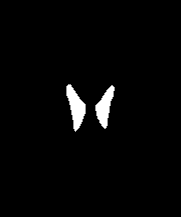

In [43]:
import plotly.express as px

px.imshow(Ground_truth_ventricles) #hover over image to find the vertex points 

In [25]:
# choosing seed point from ventricles
left_seed_point = [79,109]
right_seed_point = [103,108]

In [26]:
#Applying region growing function over the selected points 

segmentation1_ventricles  = region_growing(brain_image, left_seed_point, threshold_[0], conn=4)
segmentation2_ventricles =  region_growing(brain_image, right_seed_point, threshold_[0], conn=4)

final_ventricles_segmentation = segmentation1_ventricles + segmentation2_ventricles

In [27]:
#dtermining dice coefficient final verticles segmentations  and Ground_truth_ventricles
dice_coef_final_segmentation_ventricle = dice_coef(Ground_truth_ventricles[:,:,0], final_ventricles_segmentation)


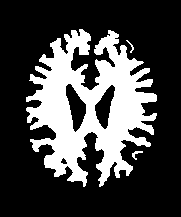

In [42]:
import plotly.express as px

px.imshow(Ground_truth_white_matter) #hover over image to find the vertex points to get the seed

In [29]:
# choosing seed point from ventricles of whit
seed_point = [91,104]

In [30]:
#Applying region growing function over the selected points 

segmentation_white_matter  = region_growing(brain_image, seed_point, threshold_[0], conn=4)

In [31]:
#dtermining dice coefficient segmentation_white_matter  and Ground_truth_white_matter
dice_coef_final_segmentation_white_matter = dice_coef(Ground_truth_white_matter[:,:,0], segmentation_white_matter)

##### Improving results
Improve you segmentation region growing results - both for the ventricles and white matter - using morphological operations. 
[Sci-kit image - morphology](https://scikit-image.org/docs/dev/api/skimage.morphology.html)

- we have used  binary opening to imporove the result

In [33]:
from skimage import morphology

In [34]:
improved_ventricals = morphology.binary_opening(final_ventricles_segmentation)

In [35]:
improved_white_matter = morphology.binary_opening(segmentation_white_matter)

## Report

- For Exercises 3.1 and 3.2 plot a 2-by-3 figure of the segmentations of the ventricles and white matter (after thresholding, region growing and region growing followed by morphological operations) and their corresponding ground truth.

Text(0.5, 1.0, 'Segmentized White Matter after morphological operation')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\tanjil\anaconda3\envs\image_transferlearning\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(re

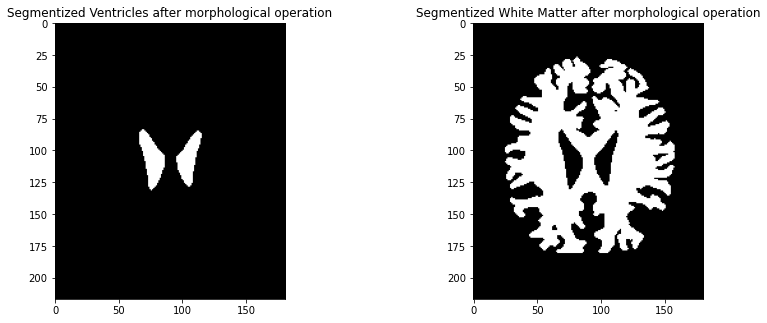

In [36]:
h,w = 2,3
plt.figure(figsize=(20,20));plt.subplots_adjust(hspace=0.2,wspace=0.5)

plt.subplot(h,w,1);imshow(improved_ventricals, cmap='gray');title('Segmentized Ventricles after morphological operation')
plt.subplot(h,w,2);imshow(improved_white_matter, cmap='gray');title('Segmentized White Matter after morphological operation')

In [37]:
#dtermining dice coefficient improved verticles segmentations after morphology  and Ground_truth_ventricles
dice_coef_improved_ventricle=dice_coef(Ground_truth_ventricles[:,:,0], improved_ventricals)

#dtermining dice coefficient improved white matter segmentations after morphology  and Ground_truth_white_matter
dice_coef_improved_white_matter=dice_coef(Ground_truth_ventricles[:,:,0], improved_white_matter)

### - Provide a table of the obtained Dice coefficients for each method and each structure.

In [40]:
dic_list =[['Against segmentation b1',dice_coef1,'Against segmentation b3',dice_coef2],
           ['Against Seed Points final segmentation',dice_coef_final_segmentation_ventricle,'Against Seed Points final segmentation',dice_coef_final_segmentation_white_matter],
           ['Against improved segmentation implementing morphology',dice_coef_improved_ventricle,'Against improved segmentation implementing morphology',dice_coef_improved_white_matter]
          ]

In [41]:
import pandas as pd

df = pd.DataFrame(dic_list, columns=['_-_','Ventricles','__-__','White Matter'])
df


_-_  Ventricles  \
0                            Against segmentation b1    0.242498   
1             Against Seed Points final segmentation    0.995910   
2  Against improved segmentation implementing mor...    0.995910   

                                               __-__  White Matter  
0                            Against segmentation b3      0.848851  
1             Against Seed Points final segmentation      0.939892  
2  Against improved segmentation implementing mor...      0.969892

- Briefly comment on the obtained results for the segmentations and corresponding measures.

==> dice coef reveals how accurately we did our implentation , we can conclude via saying it, after using binary opening as the morphology operation we can observe the result gettibg better near to 1 . 

- What morphological methods did you use? Why?

We decided to use binary opening as morphological opening is specified as degradation followed by expansion. Small patches of light can be erased, and small dark cracks can be rejoined by opening. This is frequently the case with the "opening" of spaces between black and white parts.